# Llama 3.2 Multimodal Prompting

In [1]:
import warnings
warnings.filterwarnings('ignore')

Please check available models in here
https://api.together.xyz/models

In [2]:
from utils import load_env
load_env()

In [3]:
from utils import llama32
from utils import llama31

## Text input only question

In [4]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"}
]

In [5]:
response_32 = llama32(messages,11)
print(response_32)

The book "Charlotte's Web" was written by E.B. White. It was first published in 1952 and has since become a beloved children's classic. E.B. White was an American author, best known for his children's books, including "Charlotte's Web", "Stuart Little", and "The Trumpet of the Swan".


In [6]:
response_31 = llama31(messages,70)
print(response_31)

The book "Charlotte's Web" was written by E.B. White.


## Reprompting with new question

In [7]:
messages = [
  {"role": "user",
    "content": "Who wrote the book Charlotte's Web?"},
      {"role": "assistant",
    "content": response_32},
      {"role": "user",
    "content": "3 of the best quotes"}
]

In [8]:
response_32 = llama32(messages,90)
print(response_32)

Here are three of the most famous and beloved quotes from "Charlotte's Web":

1. **"You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hustling and bustling about, trying to find something to eat and a place to sleep, and then, of course, there's the web. But I wouldn't trade it. It's a pretty good life, if you ask me."**

— Charlotte (Chapter 21)

2. **"It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."**

— Narrator (Chapter 22)

3. **"You've got a friend in me, Wilbur. You've got a friend in me."**

— Charlotte (Chapter 9)

These quotes capture the essence of the story, highlighting the themes of friendship, loyalty, and the beauty of life.


In [9]:
response_31 = llama31(messages,70)
print(response_31)

Here are three of the best quotes from "Charlotte's Web":

1. "You have been my friend," replied Charlotte. "That in itself is a tremendous thing. I wove my webs for you because I liked you. After all, what's a life anyway? We're born, we live a little while, we die. A spider's life can't help being something of a mess, with all this hurrying backward and forward, this scurrying around from one place to another, this constant anxiety of what's going to happen next."

- Charlotte (Chapter 22)

2. "It is not often that someone comes along who is a true friend and a good writer. Charlotte was both."

- Narrator (Chapter 22)

3. "You have saved my life, and I have saved yours. Now we are even, and there is no need to remember what either of us has done for the other."

- Charlotte (Chapter 22)


## Question about an image

In [10]:
from utils import disp_image

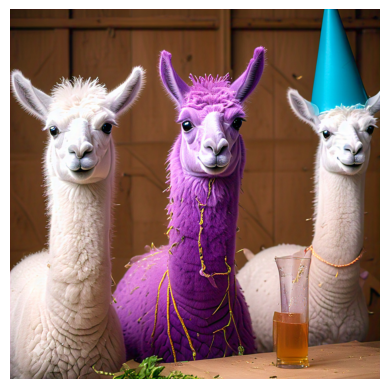

In [25]:
img_path = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/images/Llama_Repo.jpeg"
disp_image(img_path) # Example usage for local image

### Image from a URL

In [19]:
image_url = ("https://raw.githubusercontent.com/meta-llama/"
            "llama-models/refs/heads/main/Llama_Repo.jpeg")
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": image_url}
      }
    ]
  },
]

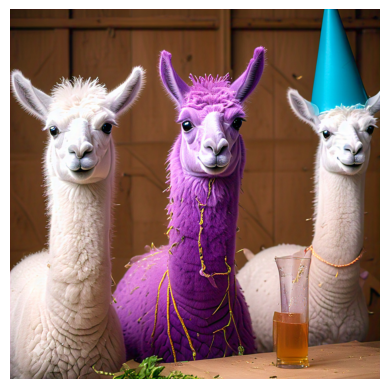

The image depicts three llamas, one of which is purple and wearing a party hat, standing behind a table with a glass of beer on it.


In [20]:
disp_image(image_url)
result = llama32(messages,90)
print(result)

### Using a local image

In [26]:
import base64

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')
base64_image = encode_image(image_path=img_path)

In [ ]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
]

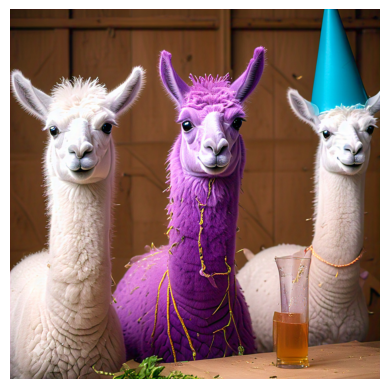

The image depicts three llamas, one of which is purple and wearing a party hat, standing behind a table with a glass of beer on it.


In [27]:
disp_image(image_url)
result = llama32(messages,90)
print(result)

## Follow up question about an image

In [28]:
messages = [
  {"role": "user",
    "content": [
      {"type": "text",
        "text": "describe the image in one sentence"
      },
      {"type": "image_url",
        "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"}
      }
    ]
  },
  {"role": "assistant", "content": result},
  {"role": "user", "content": "how many of them are purple?"}
]

In [29]:
result = llama32(messages)
print(result)

One of the llamas is purple.


### Define llama32pi() helper

In [33]:
def llama32pi(prompt, image_url, model_size=11):
  messages = [
    {
      "role": "user",
      "content": [
        {"type": "text",
          "text": prompt},
        {"type": "image_url",
          "image_url": {
            "url": image_url}
        }
      ]
    },
  ]
  result = llama32(messages, model_size)
  return result

In [34]:
print(llama32pi("describe the image in one sentence",
                "https://raw.githubusercontent.com/meta-llama/"
                "llama-models/refs/heads/main/Llama_Repo.jpeg"))

The image depicts three alpacas, one of which is purple and wearing a party hat, sitting at a table with a glass of beer and some greenery.


In [35]:
print(llama32pi("describe the image in one sentence",
                f"data:image/jpeg;base64,{base64_image}"))

The image depicts three alpacas, one of which is purple and wearing a party hat, sitting at a table with a glass of beer and some greenery.


## Plant recognition

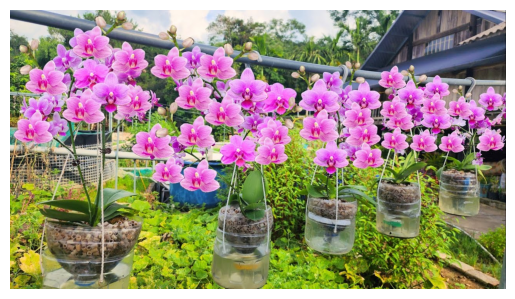

In [39]:
orchid_path = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/images/orchid.jpg"

disp_image(orchid_path)

In [37]:
question = ("What kind of plant is this in my garden?"
            "Describe it in a short paragraph.")

In [38]:
base64_image = encode_image(orchid_path)
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The plant in your garden is an orchid, specifically a Phalaenopsis orchid, also known as a moth orchid. It is characterized by its long-lasting flowers and ability to thrive in a variety of environments. The plant has dark green leaves and produces clusters of fragrant, showy flowers in shades of pink, purple, white, and yellow. The flowers are typically 2-3 inches in diameter and have three petals and three sepals. The plant is relatively low-maintenance and can be grown indoors or outdoors in warm climates. It is a popular choice for gardeners due to its beauty and ease of care.


## Dog breed recognition

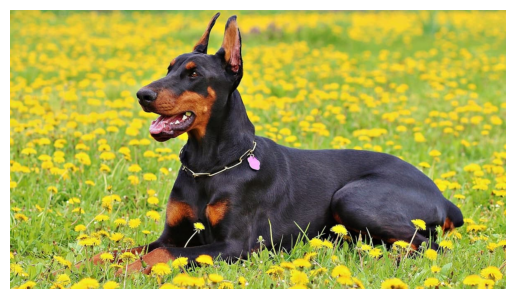

In [40]:
dog_1 = "/Users/tharhtet/Documents/github/Llama3_2_And_Applications/images/doberman.png"
disp_image(dog_1)

In [41]:
question = (("What dog breed is this? Describe in one paragraph,"
             "and 3-5 short bullet points"))
base64_image = encode_image(dog_1)
result = llama32pi(question, f"data:image/jpg;base64,{base64_image}")
print(result)

The dog breed depicted in the image is a Doberman Pinscher. The Doberman Pinscher is a medium to large-sized breed of domestic dog known for its intelligence, athleticism, and loyalty. They are often used as guard dogs, police dogs, and search and rescue dogs due to their high energy levels and strong work ethic.

Here are some key characteristics of the Doberman Pinscher breed:

* **Intelligence**: Highly intelligent and trainable, making them excel in various roles such as police work, search and rescue, and as family pets.
* **Athleticism**: Built for speed and agility, Dobermans are natural athletes and excel in dog sports like agility and obedience.
* **Loyalty**: Known for their loyalty to their family, Dobermans can be wary of strangers and may require time to warm up to new people.
* **Size**: Males typically weigh between 70-90 pounds (32-41 kg) and stand 26-28 inches (66-71 cm) tall at the shoulder, while females weigh between 60-80 pounds (27-36 kg) and stand 24-26 inches (6

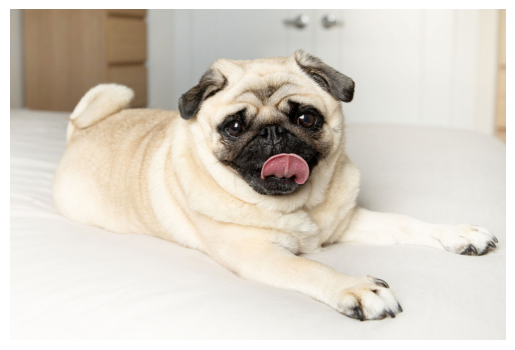

In [43]:
dog_2 = "/Users/tharhtet/Documents/github/Llama3_2_And_Applications/images/cute_dog.png"
disp_image(dog_2)

In [44]:
base64_image = encode_image(dog_2)
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The dog breed depicted in the image is a Pug. The Pug is a small, compact dog with a distinctive wrinkled face and a short, curved tail. They have a broad head, large eyes, and a flat nose. Their coat is short and smooth, coming in a variety of colors including fawn, black, and silver.

Here are some key characteristics of the Pug breed:

* **Size:** Pugs are small dogs, typically weighing between 10-17 pounds (4.5-7.7 kg) and standing between 10-13 inches (25-33 cm) tall at the shoulder.
* **Temperament:** Pugs are known for their friendly, outgoing personalities and are often described as playful, loyal, and affectionate.
* **Grooming:** Pugs have a short, easy-to-maintain coat that requires minimal grooming.
* **Health:** Pugs are prone to certain health issues, including respiratory problems, eye problems, and obesity, so regular veterinary care is important.


## Tire pressure warning

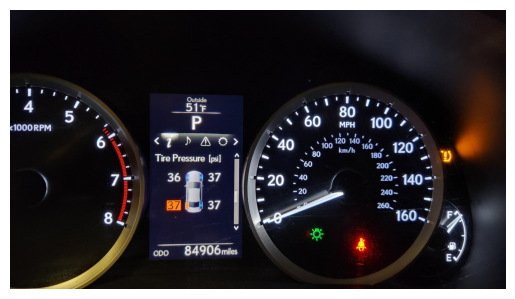

In [45]:
tire_pressure = r"/Users/tharhtet/Documents/github/Llama3_2_And_Applications/images/tire_pressure.png"
disp_image(tire_pressure)

In [46]:
question = (("What's the problem this is about?"
             " What should be good numbers?"))

In [47]:
base64_image = encode_image(tire_pressure)
result = llama32pi(question, f"data:image/png;base64,{base64_image}")
print(result)

The image shows a car's dashboard, specifically the tire pressure and speedometer gauges. The tire pressure gauge indicates that the pressure is 37 psi, which is below the recommended level of 36 psi. The speedometer gauge shows a speed of 0 mph.

The problem with this image is that the tire pressure is too low, which can lead to reduced fuel efficiency, uneven tire wear, and increased risk of a blowout. It is recommended to check the tire pressure regularly and adjust it as needed to ensure proper inflation.

In general, the recommended tire pressure for a vehicle can vary depending on factors such as the type of vehicle, driving conditions, and load capacity. It is best to consult the owner's manual or the tire information placard on the driver's side doorjamb for the recommended tire pressure for your specific vehicle.
